14.3 Checkpoint Best Neural Network Model Only

In [1]:
# Setup 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf
print(tf.__version__)
seed = 7
np.random.seed(seed)

Using TensorFlow backend.


1.4.0


In [2]:
# Load dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)

In [3]:
# Model creation function
def create_model(optimizer='rmsprop', init='normal'):
    # Create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [4]:
model = create_model()

In [5]:
# checkpoint
from keras.callbacks import ModelCheckpoint
weights_filepath="weights.best.ex05.hdf5"
checkpoint = ModelCheckpoint(weights_filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [6]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, 
                    batch_size=5, callbacks=callbacks_list, verbose=0)

Epoch 00001: val_acc improved from -inf to 0.63780, saving model to weights.best.ex05.hdf5
Epoch 00002: val_acc did not improve
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc did not improve
Epoch 00011: val_acc did not improve
Epoch 00012: val_acc improved from 0.63780 to 0.64173, saving model to weights.best.ex05.hdf5
Epoch 00013: val_acc improved from 0.64173 to 0.64961, saving model to weights.best.ex05.hdf5
Epoch 00014: val_acc did not improve
Epoch 00015: val_acc did not improve
Epoch 00016: val_acc did not improve
Epoch 00017: val_acc improved from 0.64961 to 0.66535, saving model to weights.best.ex05.hdf5
Epoch 00018: val_acc did not improve
Epoch 00019: val_acc did not improve
Epoch 00020: val_acc did not improve
Epoch 00021: val_acc did not improv

In [7]:
# load weights
model.load_weights(weights_filepath)
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 78.74%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


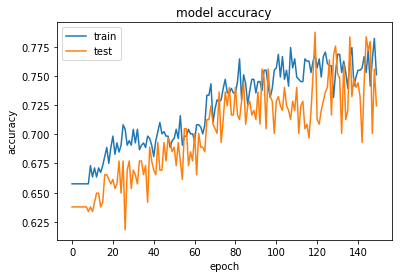

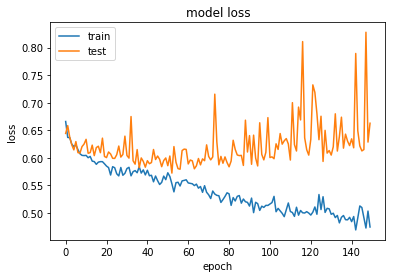

In [8]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()